# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import z-score scaler, PCA, TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### **Loading the data**

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount("/content/drive")

# read the dataset saved in google drive
auto_mpg = pd.read_csv('/content/drive/MyDrive/Python Course/auto-mpg.csv')

# returns the first 5 rows
auto_mpg.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Data Overview**

- Observations
- Sanity checks




In [ ]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

*   The data consists of 398 rows and 8 columns.
*   All columns have 398 entries, suggesting that there are no missing values. This can be confirmed using the isnull() function.
* 'mpg,' 'cylinders,' 'displacement,' 'weight,' 'acceleration,' and 'model year' are stored as numeric data types. The remaining columns - 'car name' and 'horsepower' - are object types. In the case of car name, this makes sense; however, 'horsepower' will likely need to be converted to a numeric type and may have missing values.



## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [ ]:
# creates a copy of the data for processing

df = auto_mpg.copy()

In [ ]:
# confirms no null values

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

In [ ]:
# checks for unique values in each column

df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
car name        305
dtype: int64

**Observations:**
*   In the 398 observations, there are 305 unique car names. As 'car name' is an object type containing mostly unique entries, it is likely not a relevant feature for dimensionality reduction. We can drop this column from our analysis.
* While 'horsepower' is stored as an object data type, it appears to contain mostly numeric data and has relatively few unique values. This suggests that it may be a relevant feature for our dimensionality reduction analysis, but will need to be checked for any non-numeric values and then converted to the appropriate data type.



In [ ]:
# drops 'car name' column from df

df = df.drop(['car name'], axis = 1)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [ ]:
# checks for non-numeric values in 'horsepower'

df_hp = df[df.horsepower.str.isdigit() == False]
df_hp

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [ ]:
# converts 'horsepower' to numeric variable
# 'coerce' should change '?' values to NaN

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [ ]:
# 'horsepower' should now be numeric with 6 null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [ ]:
# isolates rows where 'horsepower' is null
# should be the same 6 rows that were previously '?'

df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


**Observations:**

*   As observed previously, the 'horsepower' column was stored as an object type but contains mostly unique, numerical values. 392 entries could be successfully converted to a numeric data type.
*   The remaining 6 observations were entered as '?' and could not be converted to numeric values. These will need to be treated as missing values.
* As 'horsepower' is now a numeric data type, we can impute the missing values with the median value of the 'horsepower' column. Since the number of missing values is relatively low, this should not have a significant impact on our analysis.



In [ ]:
# imputes missing values with median of 'horsepower'

df.horsepower.fillna(df.horsepower.median(), inplace = True)

# confirms that all null values have been imputed

df.horsepower.isnull().sum()

0

In [ ]:
# final check for duplicate rows

df[df.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year


### **Summary Statistics**

In [ ]:
# gives a summary of each numeric variable

df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**

* 'mpg' describes the miles per gallon of each car. This ranges from 9 mpg (least fuel efficient) to 46.6 mpg (most fuel efficient) with a mean of 23.5.
* 'cylinders' describes the number of cylinders in the engine of each car. Based on the data, each entry will likely be a whole number between 3 and 8, with at least 25% of the cars having 8 cylinders.
* 'displacement' describes engine size, ranging from 68 cu. inches (smallest) to 455 cu. inches (largest) with a mean of 193.4.
* 'horsepower' ranges from 46 (lowest power) to 230 (highest power) with a mean of 104.3.
* 'weight' ranges from 1613 lbs (lightest car) to 5140 lbs (heaviest car) with a mean of 2970.4.
* 'acceleration describes the time taken to accelerate from 0 to 60 mph. This ranges from 8 seconds (fastest acceleration) to 24.8 seconds (slowest acceleration) with a mean of 15.5.
* 'model year' ranges from 70 to 82. Based on the data, we can extrapolate that the cars were issued in years between 1970 and 1982, so that the cars with 'model year' 70 are the oldest, and cars with 'model year' 82 are the newest.

mpg
Skew : 0.46


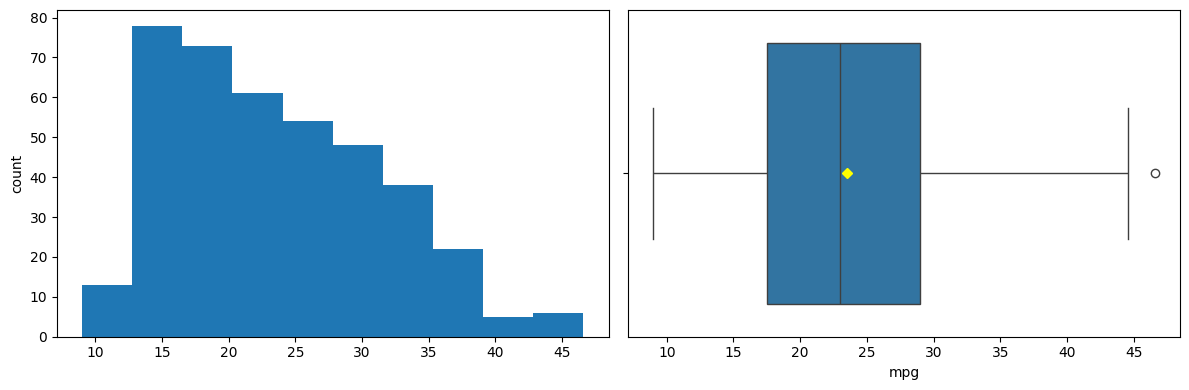

cylinders
Skew : 0.53


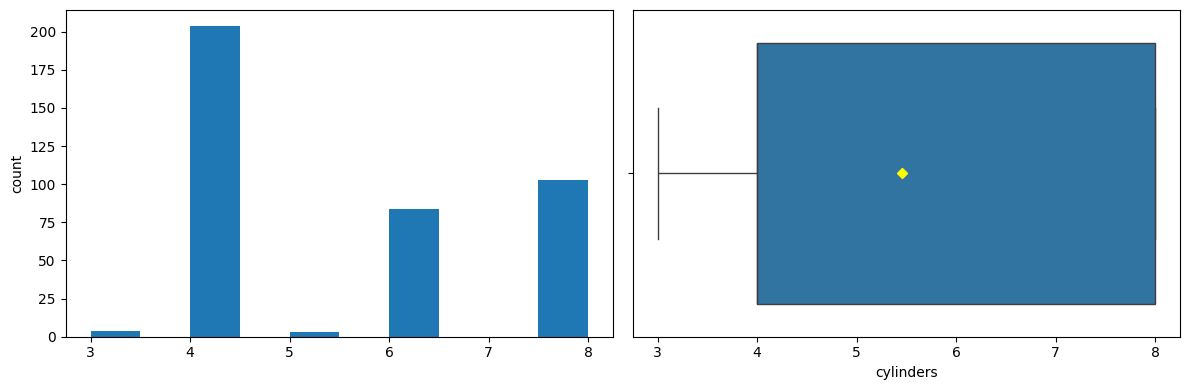

displacement
Skew : 0.72


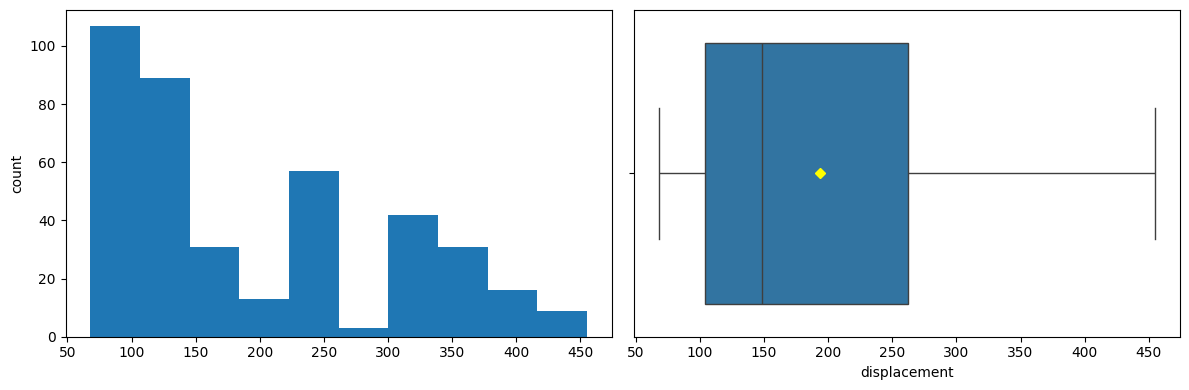

horsepower
Skew : 1.11


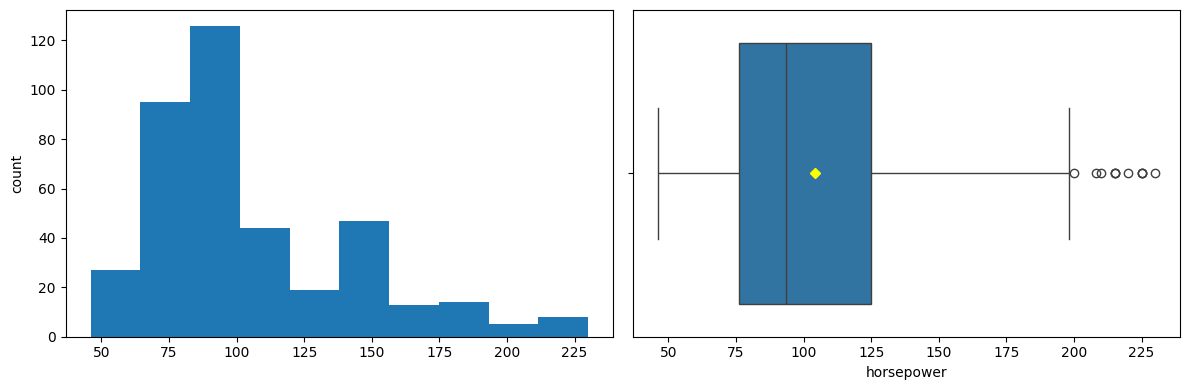

weight
Skew : 0.53


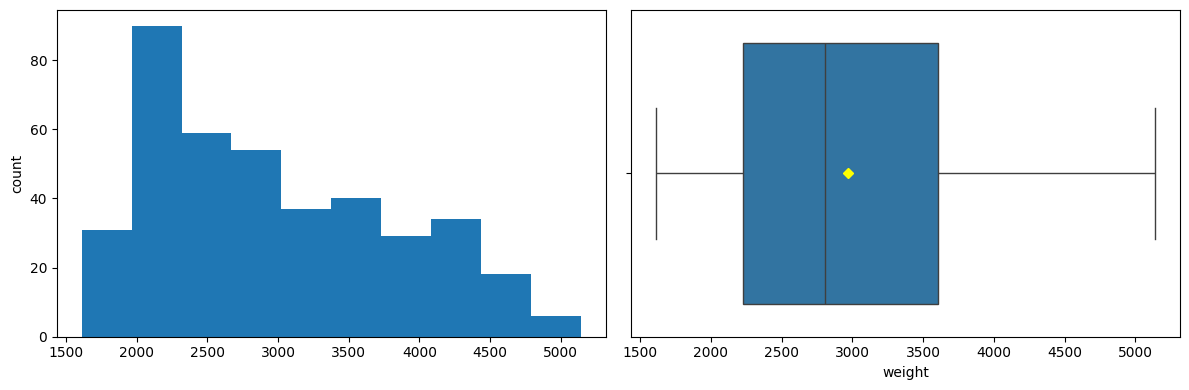

acceleration
Skew : 0.28


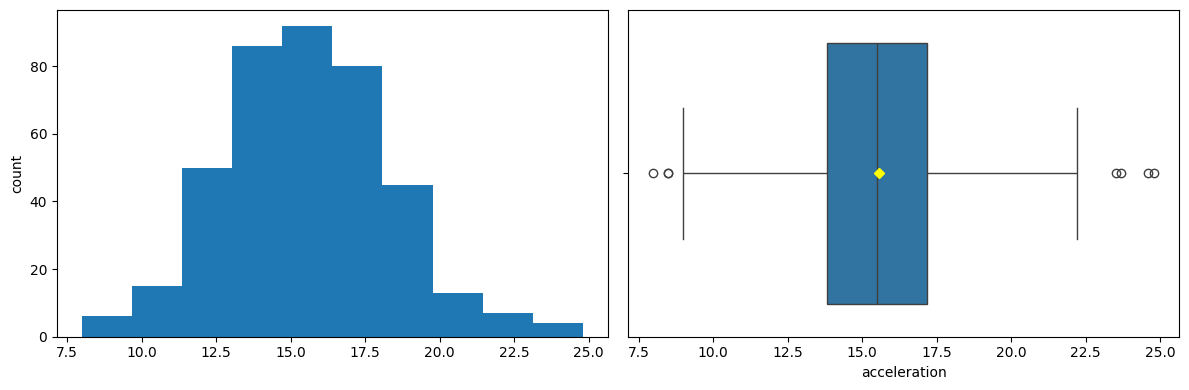

model year
Skew : 0.01


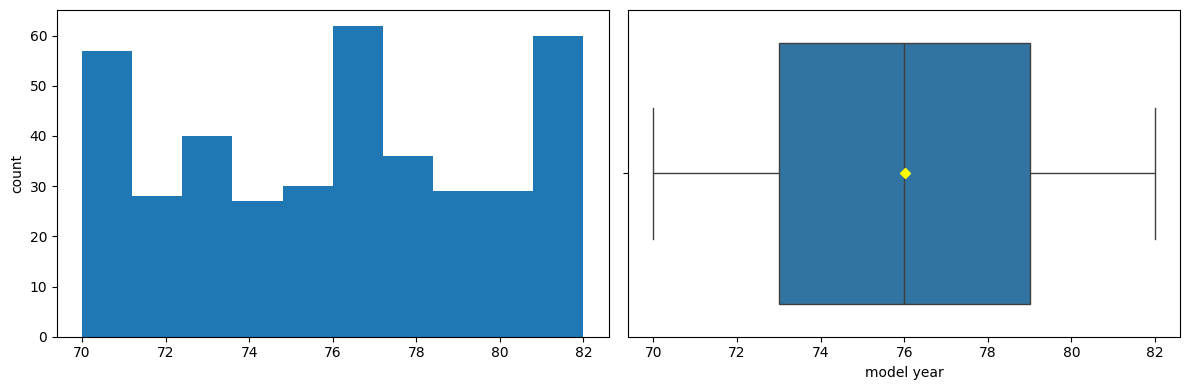

In [ ]:
# shows the distribution of each numeric variable

for col in df.columns:

    print(col)

    print('Skew :',round(df[col].skew(),2))

    plt.figure(figsize = (12, 4))

    plt.subplot(1, 2, 1)

    df[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x=df[col],showmeans=True, meanprops={"marker": "D",
                       "markerfacecolor": "yellow",
                       "markeredgecolor": "yellow",
                       "markersize": "5"})
    plt.tight_layout()

    plt.show()

**Observations:**

*   'mpg' is right-skewed, with one outlier at the max of 46.6.
*   'cylinders' ranges from 3 to 8, with a mode of 4 and smaller peaks at 6 and 8. This indicates that cars generally have an even number of cylinders.
*   'displacement' is strongly right-skewed with no outliers.
*   'horsepower' is strongly right-skewed with multiple outliers above 200.
* 'weight' is right-skewed with no outliers.
* 'acceleration' has a relatively symmetric distribution around a mean of 15.5, but with outliers to both the right and left.
* 'model year' has a mostly uniform distribution with both mean and median at 76.

* 'mpg', 'displacement', 'horsepower', and 'weight' are all somewhat similar in the shape of their distributions, which could indicate some sort of relationship between these variables.
* All outliers appear to be proper values and will not require treatment.




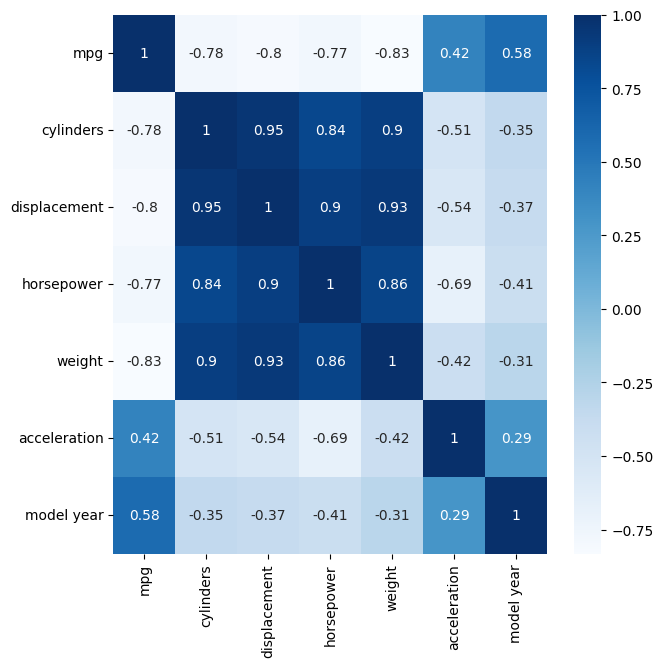

In [ ]:
# creates a heatmap of correlations between variables

plt.figure(figsize = (7, 7))

sns.heatmap(df.corr(),annot = True,cmap='Blues')

plt.show()

**Observations:**
*   'mpg' has a strong negative correlation with 'cylinders,' 'displacement,' 'horsepower,' and 'weight,' indicating that lighter cars with smaller, less powerful engines tend to be more fuel-efficient.
*   There is a strong positive correlation between 'cylinders,' 'displacement,' 'horsepower,' and 'weight,' indicating that cars with larger engines and more cylinders tend to be heavier and more powerful.
* 'horsepower' and 'acceleration' are negatively correlated, indicating that cars with more horsepower tend to accelerate faster.
* 'model year' and 'mpg' are positively correlated, which could indicate that newer cars tend to be more fuel efficient.



### **Scaling the data**

In [ ]:
# transforms data using StandardScaler
# creates df_scaled with scaled data

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

df_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

In [ ]:
# initializes pca function with 7 components

pca = PCA(n_components=df_scaled.shape[1],random_state=1)

# applies pca on scaled data

data_pca = pd.DataFrame(pca.fit_transform(df_scaled))

data_pca.head()


,0,1,2,3,4,5,6
0,2.661556,0.918577,-0.558420,0.740000,-0.549433,-0.089079,-0.118566
1,3.523307,0.789779,-0.670658,0.493223,-0.025134,0.203588,0.101518
2,2.998309,0.861604,-0.982108,0.715598,-0.281324,0.137351,-0.055167
3,2.937560,0.949168,-0.607196,0.531084,-0.272607,0.295916,-0.121296
4,2.930688,0.931822,-1.078890,0.558607,-0.543871,0.007707,-0.167301


In [ ]:
# calculates percentage of variance explained by each principal component

exp_var = pca.explained_variance_ratio_

exp_var_df = pd.DataFrame(data=exp_var,columns=['exp_var'])
exp_var_df

,exp_var
0,0.714768
1,0.123655
2,0.104140
3,0.026720
4,0.017786
5,0.007909
6,0.005022


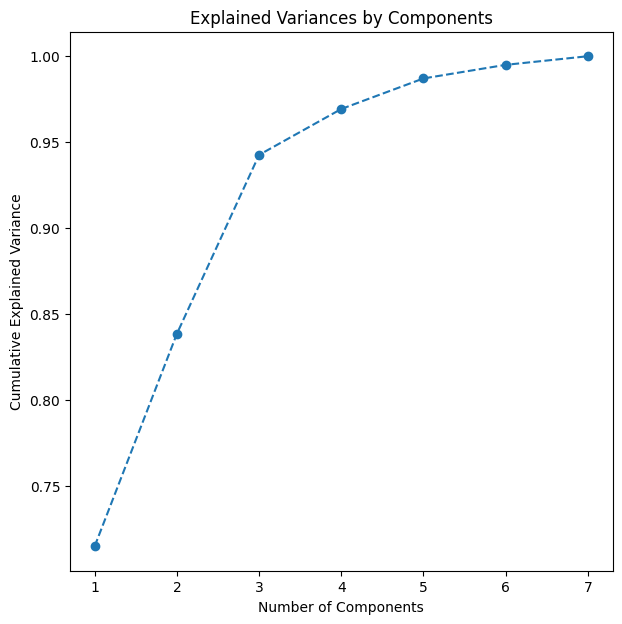

In [ ]:
# plots the explained cumulative variance by the 7 principal components

plt.figure(figsize = (7, 7))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# finds the least number of components that can explain more than 90% variance

sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i

    if(sum>0.90):

        print("Number of PCs that explain at least 90% variance:", ix + 1)
        break

Number of PCs that explain at least 90% variance: 3


**Observations:**

* The original 7 features can be reduced to 3 principal components that explain ~95% of the original variance.
* 71% of the total variance in the dataset is explained by PC1. This suggests that PC1 captures a large amount of information and represents the dominant direction of variability in the data.
* PC2 and PC3 also appear to be significant, while the remaining principal components capture diminishing proportions of variance and may represent finer-grained or noise-related patterns in the data.


#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [ ]:
# creates a dataframe showing coefficients of first 3 PCs

df_pca=pd.DataFrame(np.round(pca.components_[:3,:],2),
                    index=['PC1','PC2','PC3'],
                      columns=df_scaled.columns)

df_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


In [ ]:
# applies colors to df_pca

def color_high(val):
    if val <= -0.40:
        return 'background: pink'

    elif val >= 0.40:
        return 'background: skyblue'

df_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**
* PC1 is positively correlated with 'cylinders,' 'displacement,' 'horsepower,' and 'weight,' and negatively correlated with 'mpg.' PC1 appears to represent a combination of variables related to the size and power of the car, versus its fuel efficiency. Since PC1 accounts for 71% of the variability,
* PC2 has a strong negative correlation with 'model year' and weak correlations with the other features.
* PC3 has a strong positive correlation with 'acceleration' and relatively weak correlations with the other features.

#### **Visualize the data in 2 dimensions using the first two principal components**



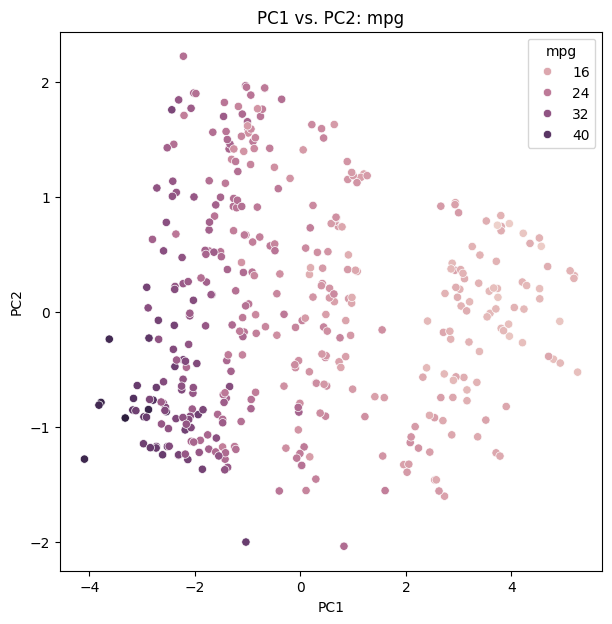

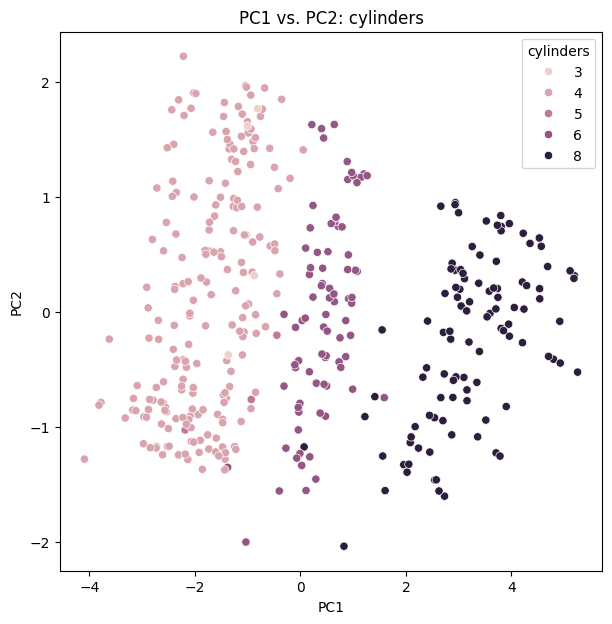

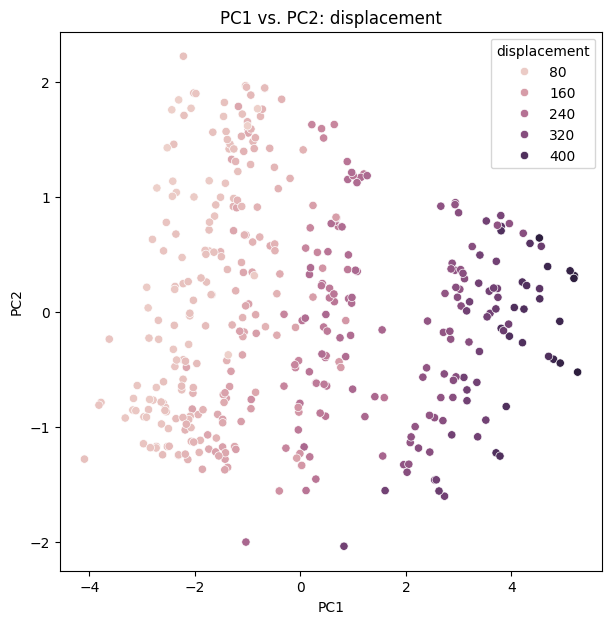

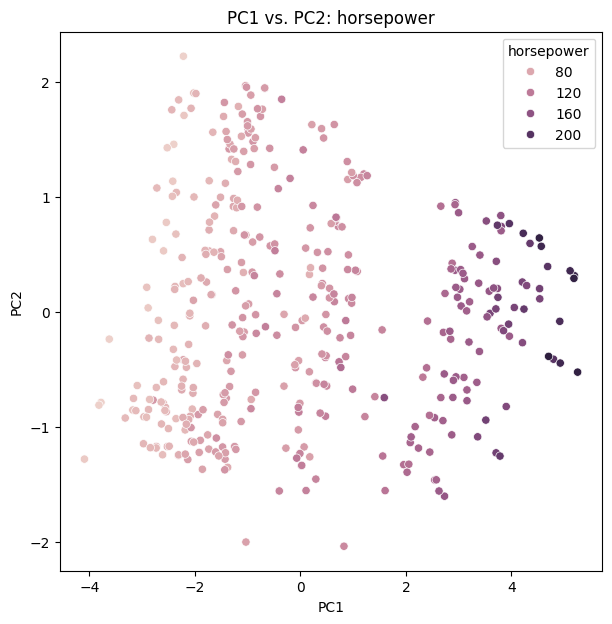

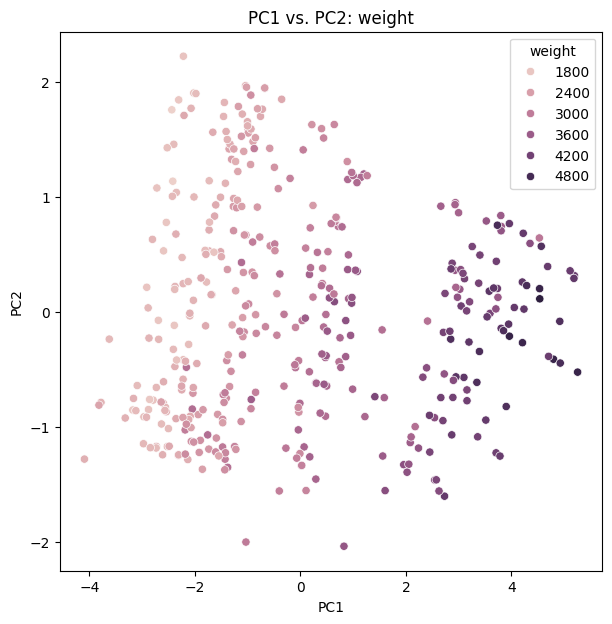

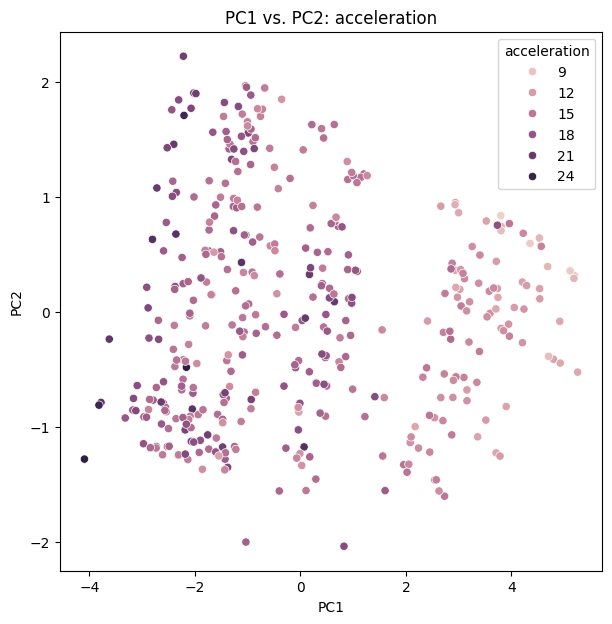

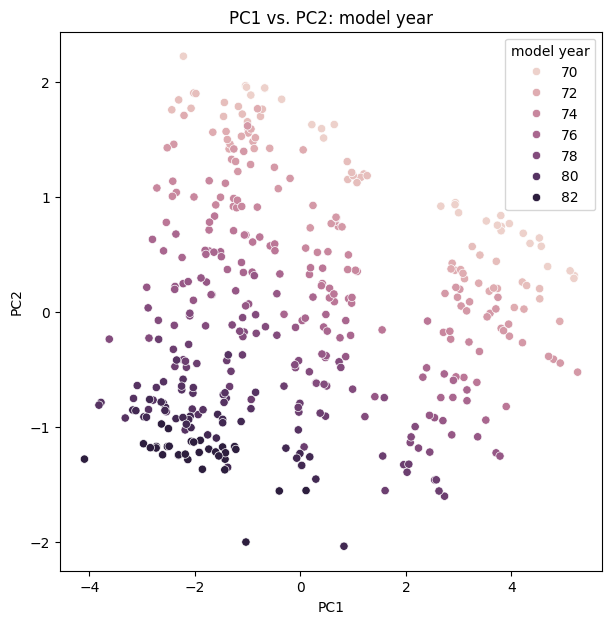

In [ ]:
# creates a scatterplot of PC1 vs PC2
# colors correspond to values of the original variables

plot_columns = df_scaled.columns

for col in plot_columns:

  plt.figure(figsize = (7, 7))

  sns.scatterplot(x=data_pca[0],y=data_pca[1],hue=df[col])

  plt.xlabel("PC1")

  plt.ylabel("PC2")

  plt.title("PC1 vs. PC2: " + str(col))

  plt.show()

**Observations:**

*   When plotting PC1 vs. PC2, similar trends can be seen with regards to multiple variables: 'cylinders', 'displacement', 'horsepower', and 'weight.' Each of these variables shows a somewhat distinct grouping of higher values towards the right side of the chart (high PC1), with lower values towards the left.
> *   This trend is most distinct when looking at 'cylinders': all of the data points in the right-side group are 8-cylinder cars.
*   The opposite trend can be seen with 'mpg' and 'acceleration,' with lower values concentrated towards the right and higher values on the left. This speaks to the negative correlation between mpg / acceleration time and the other features captured by PC1.
*   As 'model year' is more correlated with PC2, we can observe a different trend with higher values (representing newer cars) towards the bottom of the chart, and lower values (older cars) towards the top. The newest cars (produced after 1980) seem to be concentrated towards the bottom-left corner of the chart.
* Overall, this view suggests the idea of a subgroup of vintage cars with 8 cylinders, larger size, higher horsepower, and lower fuel-efficiency, produced between 1970 and 1980.






## **t-SNE**

In [ ]:
# initializes t-SNE with 2 components
tsne=TSNE(n_components=2,random_state=1,perplexity=37)

# applies t-SNE to scaled data

data_tsne=pd.DataFrame(tsne.fit_transform(df_scaled),
                         columns = ['X1','X2'])

data_tsne.head()

,X1,X2
0,31.660217,3.857812
1,32.645077,2.302160
2,32.392372,3.307511
3,31.892393,3.196287
4,32.336868,3.654518


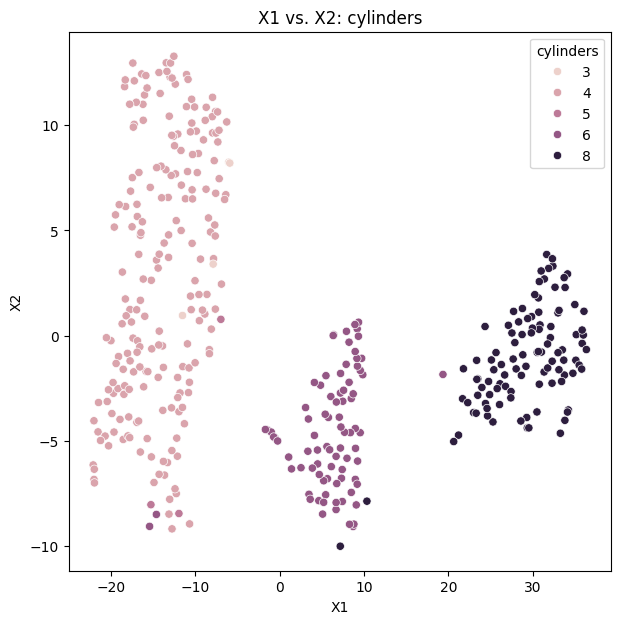

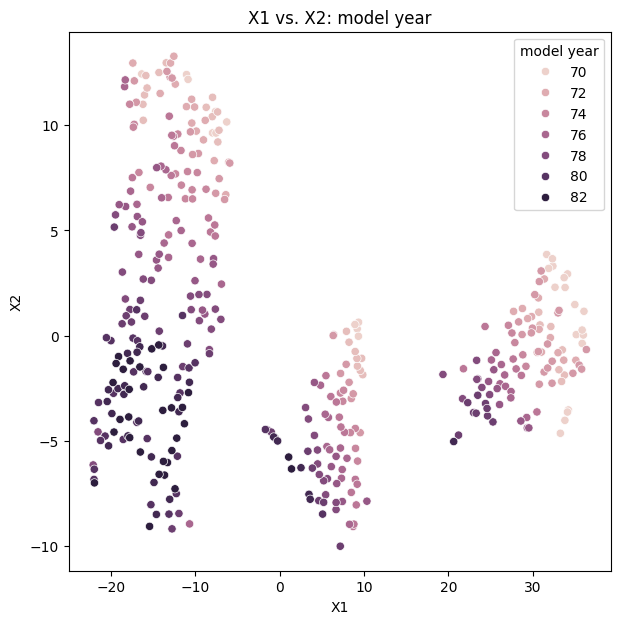

In [ ]:
# scatter plot for two components

#colors correspond to values of the original variables
  # focusing on the 2 most distinctive views

plot_columns2 = ['cylinders','model year']

for col in plot_columns2:

  plt.figure(figsize = (7,7))

  sns.scatterplot(x='X1',y='X2',data=data_tsne,
                  hue=df[col])

  plt.title("X1 vs. X2: " + str(col))

  plt.show()

**Observations:**

*   An application of t-SNE to the scaled data results in 3 distinct clusters, which most closely correspond to the number of cylinders per car. Group 1 is largely made up of cars with 3-4 cylinders, Group 2 corresponds to cars with 5-6 cylinders, and Group 3 is mostly comprised of cars with
*   While 'model year' is not split up by group in this view, we can still see a prevalence of newer cars towards the bottom of the chart, especially towards the bottom half of Group 1. It might be interesting to further subdivide Group 1 to see if we can derive any insights based on model year.

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

In [ ]:
# assigns groups based on the clusters observed above

def grouping(x):
    first_component = x['X1']

    second_component = x['X2']

    if (first_component < -5) and (second_component <= 2):
        return 'group_1b'

    if (first_component < -5 ) and (second_component > 2):
        return 'group_1a'

    if (first_component > -5 ) and (first_component < 15):
        return 'group_2'

    else:
        return 'group_3'

# adds 'group' column to data_tsne

data_tsne['group'] = data_tsne.apply(grouping, axis = 1)

data_tsne.head()

,X1,X2,group
0,31.660217,3.857812,group_3
1,32.645077,2.302160,group_3
2,32.392372,3.307511,group_3
3,31.892393,3.196287,group_3
4,32.336868,3.654518,group_3


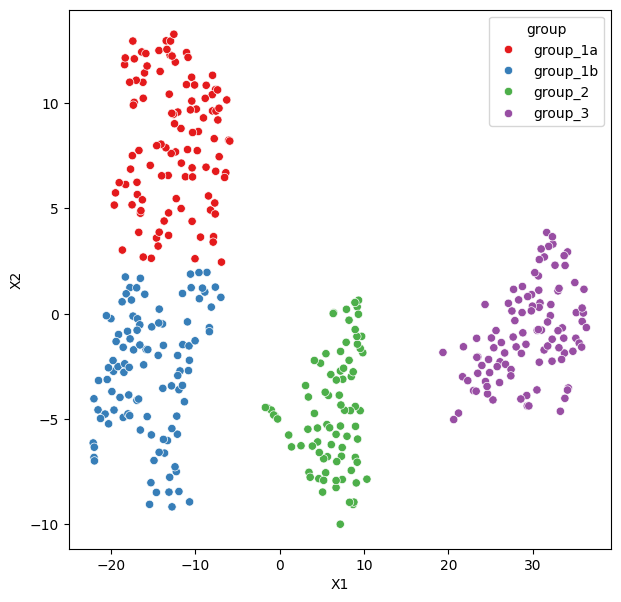

In [ ]:
# color-coding based on Groups 1, 2, and 3, plus 1a and 1b based on 'model year'   im sorry

plt.figure(figsize = (7,7))

sns.scatterplot(x='X1',y='X2',data=data_tsne,hue='group',
                hue_order=['group_1a','group_1b','group_2','group_3'],palette="Set1")

plt.show()

In [ ]:
data_tsne.group.value_counts()

group_1a    108
group_1b    105
group_3     102
group_2      83
Name: group, dtype: int64

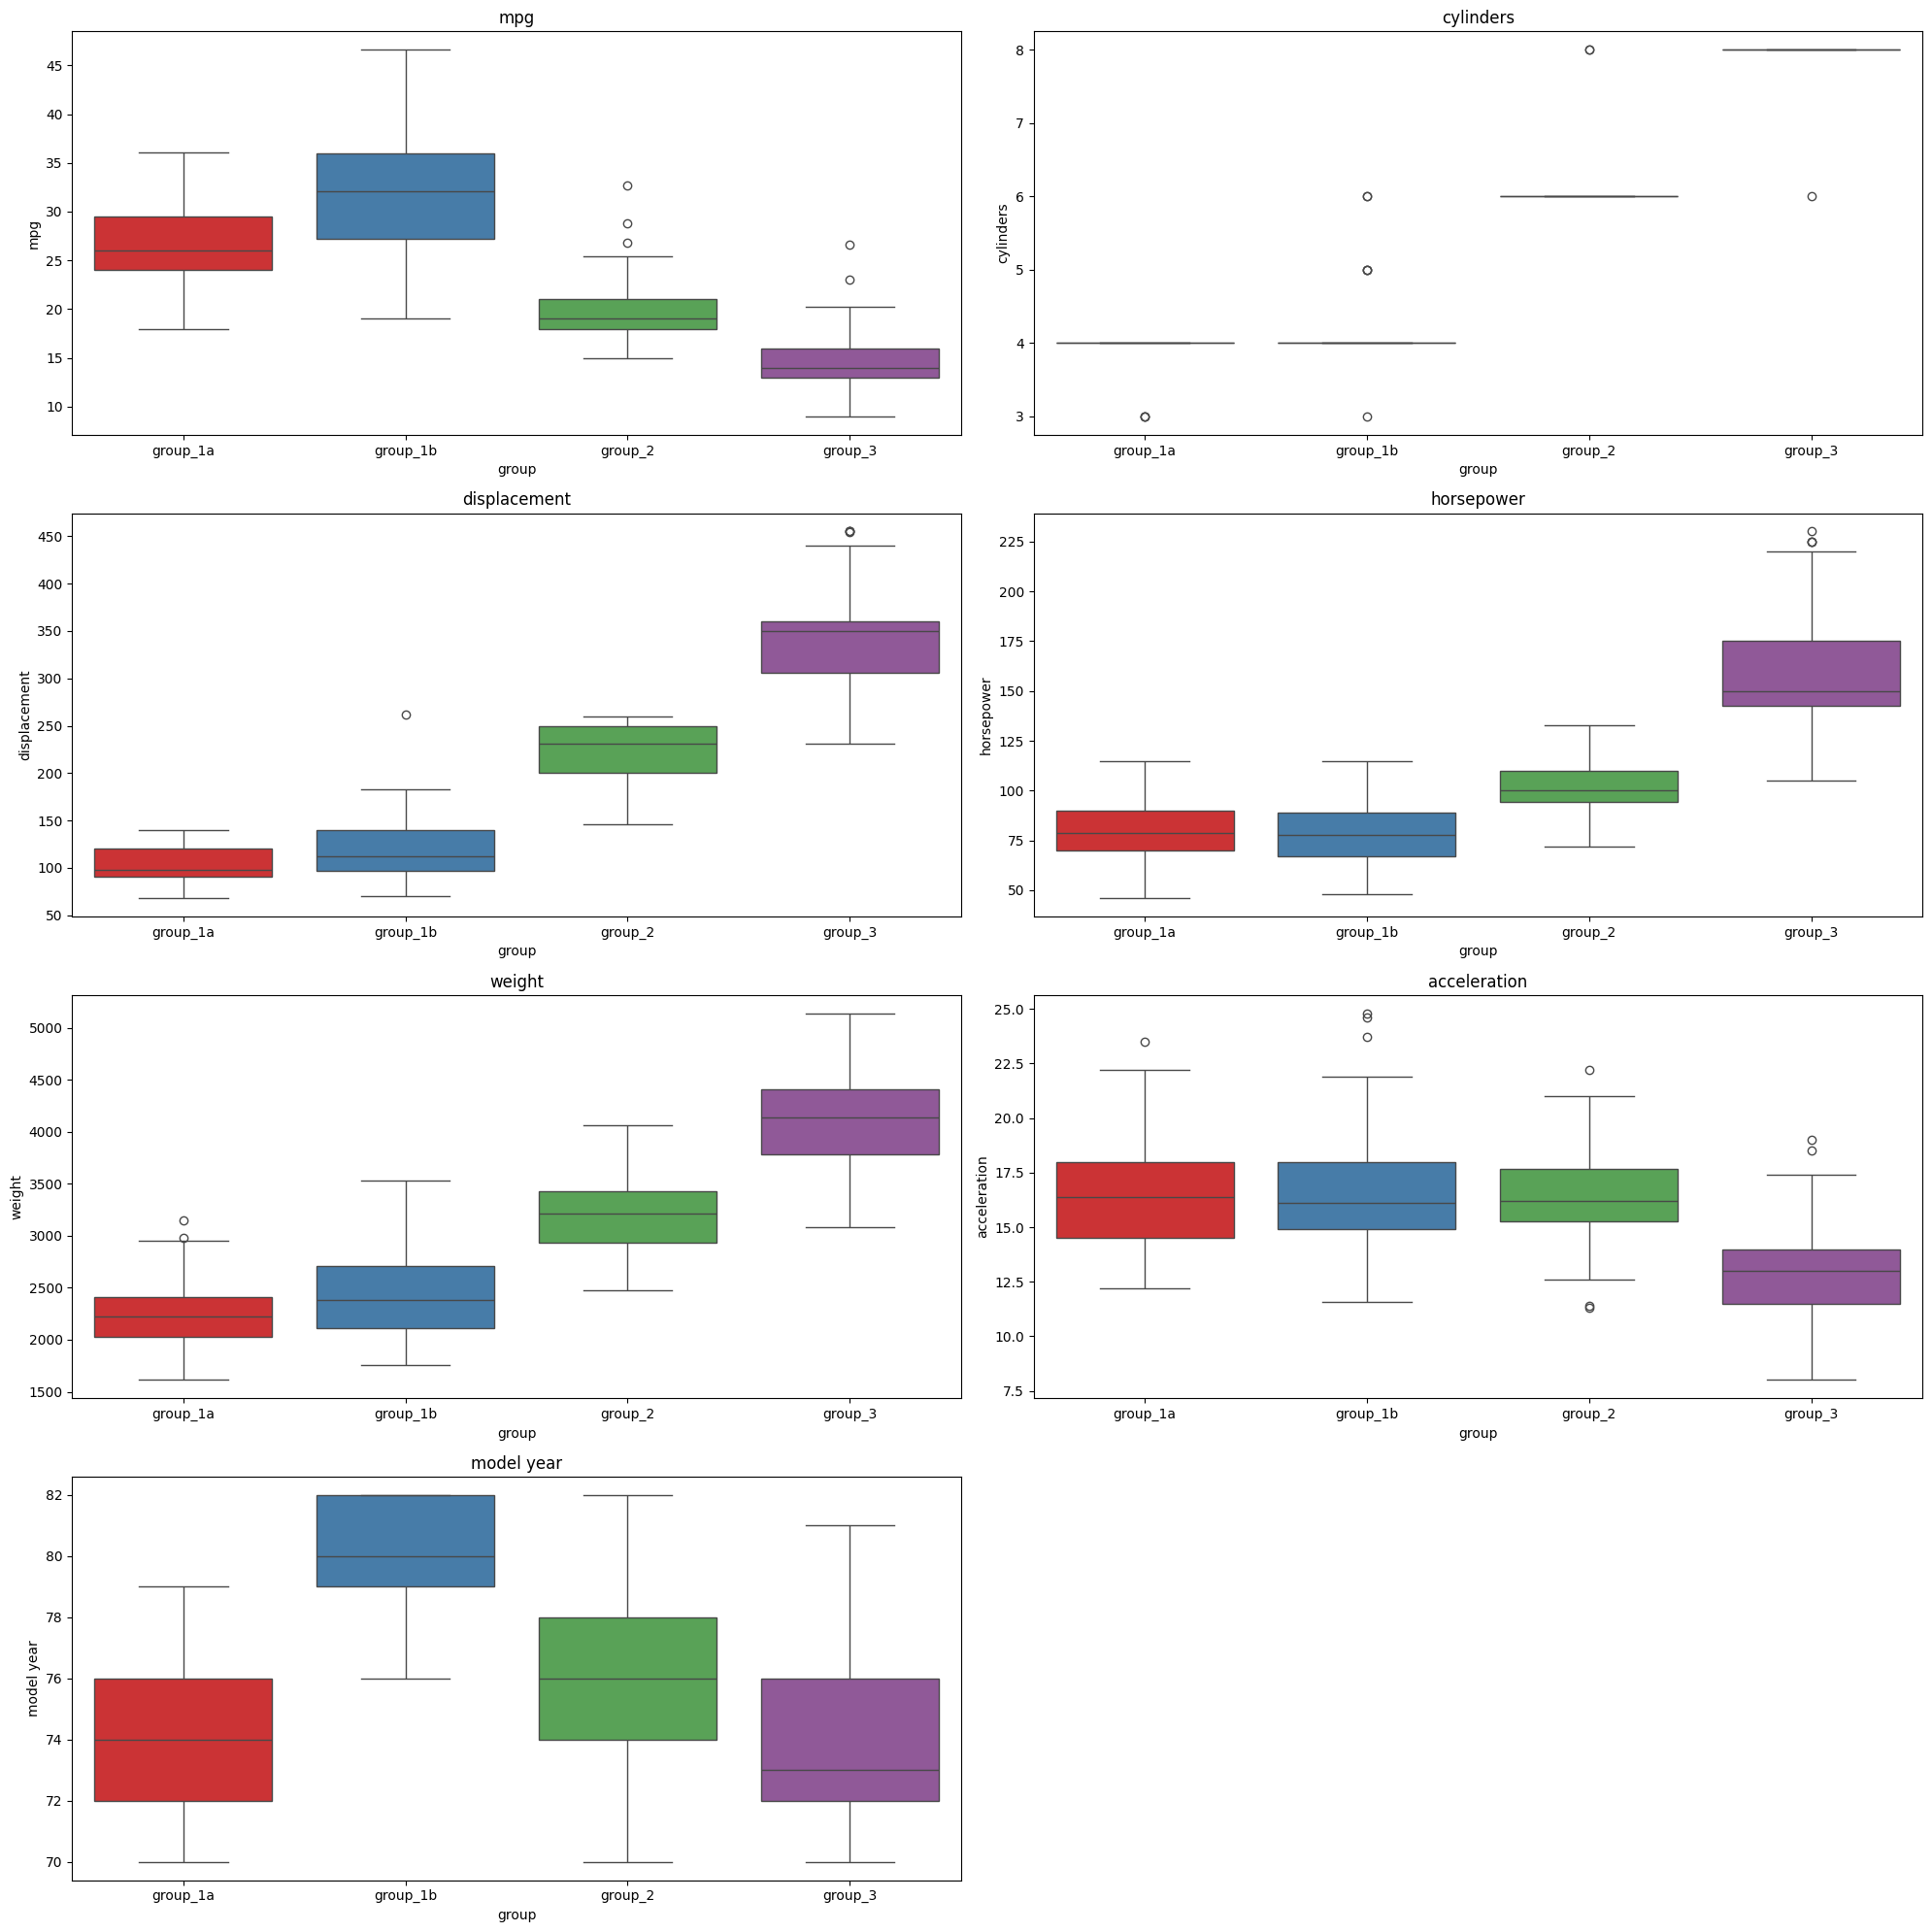

In [ ]:
all_columns = df_scaled.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_columns):
    plt.subplot(4, 2, i + 1)

    sns.boxplot(y=df[variable], x=data_tsne['group'],hue=data_tsne['group'],
                order=['group_1a','group_1b','group_2','group_3'],
                hue_order=['group_1a','group_1b','group_2','group_3'],palette='Set1')

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations:**

*   The t-SNE method indicates 3 distinct groups in the data, which most closely correspond to the number of cylinders: 4, 6, or 8. This makes sense, considering our previous observation of the 'cylinders' histogram, which revealed distinct groupings corresponding to 4, 6, or 8 cylinders.
*   Group 1 (including 1a and 1b) is mostly comprised of cars with 4 cylinders. Group 1 has higher mpg, lower displacement, lower horsepower, and lower weight, compared to groups 2 and 3.
* Group 2 is mostly comprised of 6 cylinders. Group 2 generally represents a middle ground between Groups 1 and 2, in terms of mpg, displacement, horsepower, and weight.
* Group 3 consists mostly of 8 cylinder cars. Group 3 is lower in mpg, but higher in displacement, horsepower, and weight. Group 3 is also notably lower in acceleration time, meaning that Group 3 cars, on average, can accelerate faster than cars in Groups 1 and 2.
*   1a vs 1b analysis:
>* Cars in Group 1a and 1b, for the most part, display similar characteristics: both are comprised of mostly 4-cylinder cars, with low displacement, horsepower, and weight, and average acceleration.
>* The greatest discrepancy between 1a and 1b can be observed in the model year graph, where Group 1a's range comprises 70 to 79, while Group B comprises 76 to 82.
>* Group 1b also has higher mpg on average than Group 1a. This would make sense in light of our previous observation that 'model year' and 'mpg' are positively correlated, which could indicate that newer cars tend to be more fuel efficient.







## **Actionable Insights and Recommendations**

**Insights:**


* SecondLife has sold a total of 398 vintage cars produced between 1970 and 1982.
- There is a strong positive correlation between number of cylinders and displacement, horsepower, and weight, and a strong negative correlation between cylinders and mpg. This suggests that cars with larger engines and more cylinders tend to be heavier and more powerful, at the expense of fuel efficiency. Conversely, cars with smaller engines and fewer cylinders are less powerful but more fuel efficient.




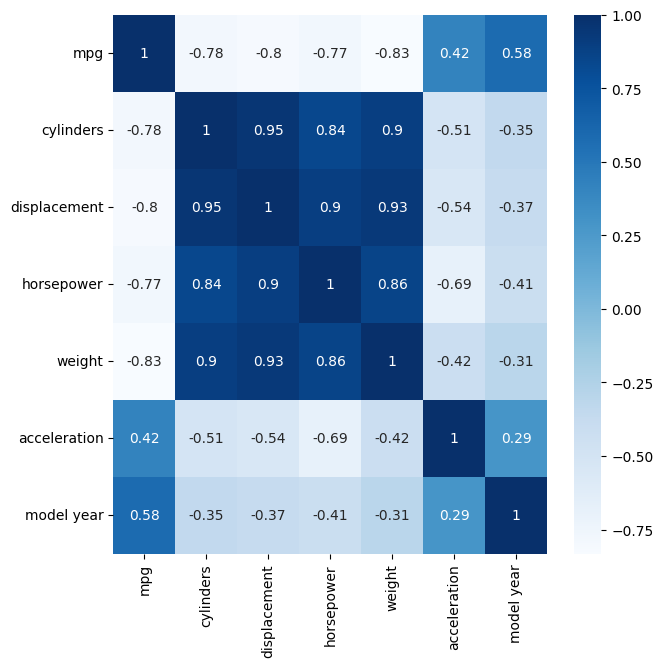

In [ ]:
plt.figure(figsize = (7, 7))

sns.heatmap(df.corr(),annot = True,cmap='Blues')

plt.show()

- An application of PCA dimensionality reduction suggests that the 8-cylinder cars, in particular, share a combination of features that distinguishes them from the other cars sold.

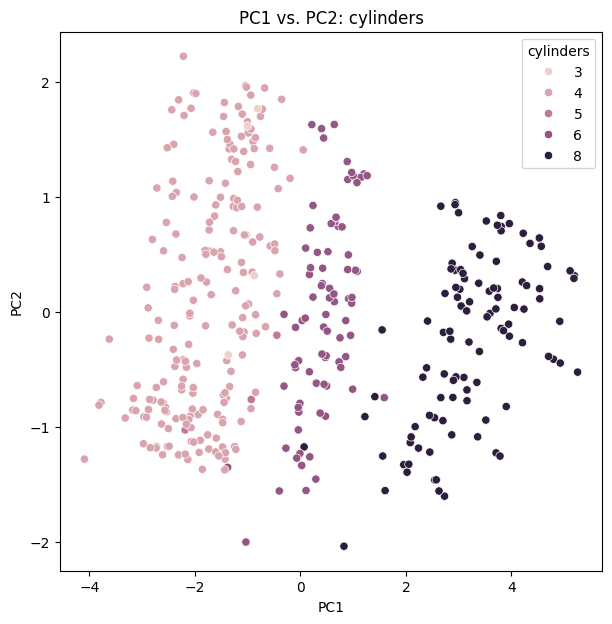

In [ ]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x=data_pca[0],y=data_pca[1],hue=df['cylinders'])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.title("PC1 vs. PC2: " + str('cylinders'))

plt.show()

- Application of t-SNE revealed 3 distinct groups of cars, also largely distinguished by the number of cylinders:

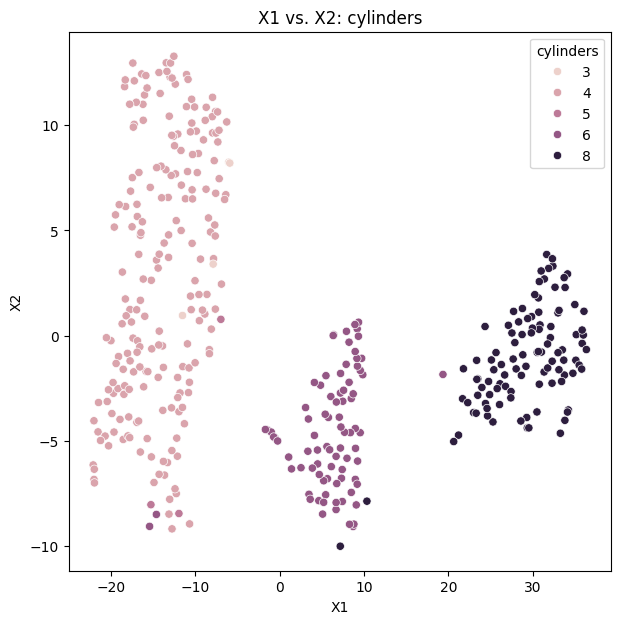

In [ ]:
plt.figure(figsize = (7,7))

sns.scatterplot(x='X1',y='X2',data=data_tsne,
                hue=df['cylinders'])

plt.title("X1 vs. X2: " + str('cylinders'))

plt.show()

- The 398 cars can be further broken down into 4 subgroups, with characteristics summarized as follows:
>* **Group 1** (including 1a and 1b) is mostly comprised of cars with 4 cylinders. Group 1 has higher mpg, lower displacement, lower horsepower, and lower weight, compared to groups 2 and 3.
>>* **Group 1a** consists mostly of 4-cylinder cars produced between 1970 and 1979.
>>* **Group 1b** consists mostly of 4-cylinder cars produced between 1976 and 1982. Cars in this subgroup are the most fuel-efficient, on average, even compared to Group 1a.
>* **Group 2** is mostly comprised of 6-cylinder cars. Group 2 generally represents a middle ground between Groups 1 and 2, in terms of mpg, displacement, horsepower, and weight.
>* **Group 3** consists mostly of 8-cylinder cars. Group 3 is lower in mpg, but higher in displacement, horsepower, and weight. Group 3 is also notably lower in acceleration time, meaning that Group 3 cars, on average, can accelerate faster than cars in Groups 1 and 2.


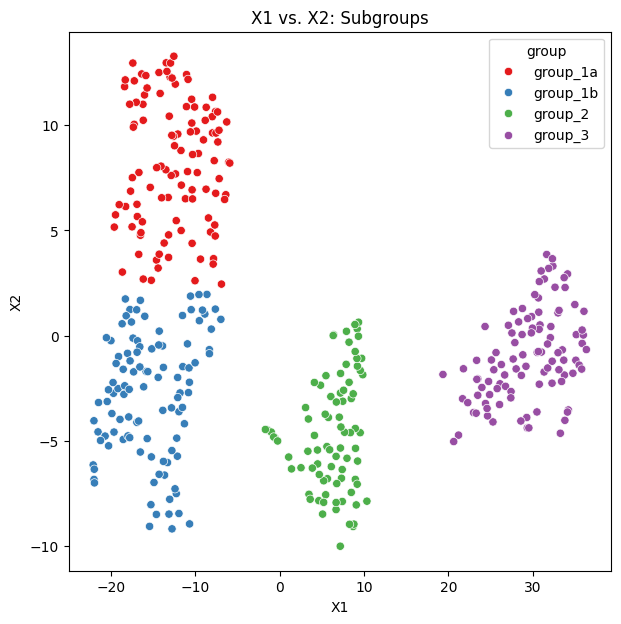

In [ ]:
plt.figure(figsize = (7,7))

sns.scatterplot(x='X1',y='X2',data=data_tsne,hue='group',
                hue_order=['group_1a','group_1b','group_2','group_3'],palette="Set1")

plt.title("X1 vs. X2: Subgroups")

plt.show()

**Recommendations:**
- SecondLife can utilize the insights gained from this analysis to develop targeted marketing strategies for the different groups of vintage cars. For example, Group 1, comprised mostly of 4-cylinder cars with higher mpg, could be marketed as a more fuel-efficient option for environmentally-conscious vintage car enthusiasts. Group 3, consisting of 8-cylinder cars, could be advertised to highlight their higher performance attributes, and Group 2 cars could be presented as a balance between fuel-efficiency and performance.
- SecondLife could also benefit from segmenting the customer base according to their preferences and purchasing behaviors related to vintage cars. This would allow for the creation of targeted marketing efforts to cater to the unique needs and preferences of each segment. For example, we could create a personalized marketing campaign targeting customers interested in fuel-efficient vintage cars, and a different campaign sent to those seeking high-performance vehicles.
- This analysis could be further refined by incorporating more data about the vintage cars that were sold. For example, we could collect information on fuel type, transmission type, mileage, ownership history (including any notable modifications or customizations made by previous owners), or other characteristics that might be relevant to our customers. Including these additional features in our analysis might help us identify other patterns in the data, which can be used to further improve our marketing and customer segmentation efforts.